In [1]:
import findspark
findspark.init()
import pyspark
from pyspark import SparkContext
from pyspark import SQLContext
from pyspark.context import SparkContext
from pyspark.sql import SparkSession  #Main entry point for DataFrame and SQL functionality.
from pyspark.sql import DataFrame #A distributed collection of data grouped into named columns.
from pyspark.sql import Column #A column expression in a DataFrame.
from pyspark.sql import Row #A row of data in a DataFrame.
from pyspark.sql import GroupedData #Aggregation methods, returned by DataFrame.groupBy().
from pyspark.sql import DataFrameNaFunctions #Methods for handling missing data (null values).
from pyspark.sql import DataFrameStatFunctions #Methods for statistics functionality.
from pyspark.sql import functions #List of built-in functions available for DataFrame.
from pyspark.sql import types #List of data types available.
from pyspark.sql import Window #For working with window functions.
from pyspark import SparkConf
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType
from pyspark.sql.functions import explode
from pyspark.sql.functions import row_number, monotonically_increasing_id
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import when

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:120% !important; }</style>"))

In [2]:
appName = "Data Visualization"
master = "local"

# Create Spark session
spark = SparkSession.builder \
    .appName(appName) \
    .master(master) \
    .getOrCreate()

In [3]:
#Read marriage fraud parquet file
marriage_df = spark.read.parquet("marriage_fraud_dataset.parquet")


marriage_df.createOrReplaceTempView("MarriageFraudTable")

print(marriage_df.count())
marriage_df.printSchema()

1000000
root
 |-- id: long (nullable = true)
 |-- Age_gap: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Number_of_children: integer (nullable = true)
 |-- Number_of_divorce: integer (nullable = true)
 |-- Different_Language: integer (nullable = true)
 |-- Different_Address: integer (nullable = true)
 |-- Criminal_history: integer (nullable = true)
 |-- Big_age_gap: string (nullable = true)
 |-- Too_many_children: string (nullable = true)
 |-- Too_many_divorce: string (nullable = true)
 |-- Too_low_income: string (nullable = true)
 |-- Indicator_Sum: double (nullable = true)
 |-- Fraud_Alert: string (nullable = true)



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [5]:

#from pyspark.sql import SparkSession
#spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
#dept = [("Finance",10),("Marketing",20),("Sales",30),("IT",40)]
#rdd = spark.sparkContext.parallelize(marriage_df)

columns = ['id', 'Age_gap', 'Income', 'Number_of_children', 'Number_of_divorce', 'Different_Language', 'Different_Address', 'Criminal_history', 'Big_age_gap', 'Too_many_children', \
           'Too_many_divorce', 'Too_low_income', 'Indicator_Sum', 'Fraud_Alert']

df = marriage_df.toDF(*columns)
df.printSchema()
df.show(truncate=False)


root
 |-- id: long (nullable = true)
 |-- Age_gap: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Number_of_children: integer (nullable = true)
 |-- Number_of_divorce: integer (nullable = true)
 |-- Different_Language: integer (nullable = true)
 |-- Different_Address: integer (nullable = true)
 |-- Criminal_history: integer (nullable = true)
 |-- Big_age_gap: string (nullable = true)
 |-- Too_many_children: string (nullable = true)
 |-- Too_many_divorce: string (nullable = true)
 |-- Too_low_income: string (nullable = true)
 |-- Indicator_Sum: double (nullable = true)
 |-- Fraud_Alert: string (nullable = true)

+------+-------+------+------------------+-----------------+------------------+-----------------+----------------+-----------+-----------------+----------------+--------------+-------------+-----------+
|id    |Age_gap|Income|Number_of_children|Number_of_divorce|Different_Language|Different_Address|Criminal_history|Big_age_gap|Too_many_children|Too_many_di

In [6]:
# (2) Instantiate a Spark Context
sqlContext = SQLContext(spark)
df1 = sqlContext.sql("SELECT * from MarriageFraudTable").toPandas()

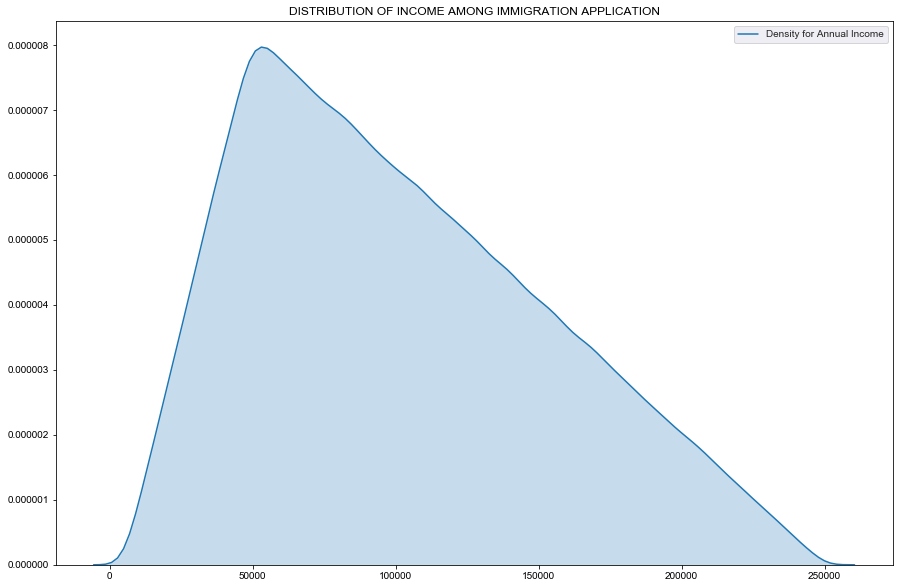

In [7]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('DISTRIBUTION OF INCOME AMONG IMMIGRATION APPLICATION') 
sns.set_style("darkgrid")
sns.kdeplot(data=df1['Income'],label="Density for Annual Income" ,shade=True)

Text(0, 0.5, 'Distribution of count')

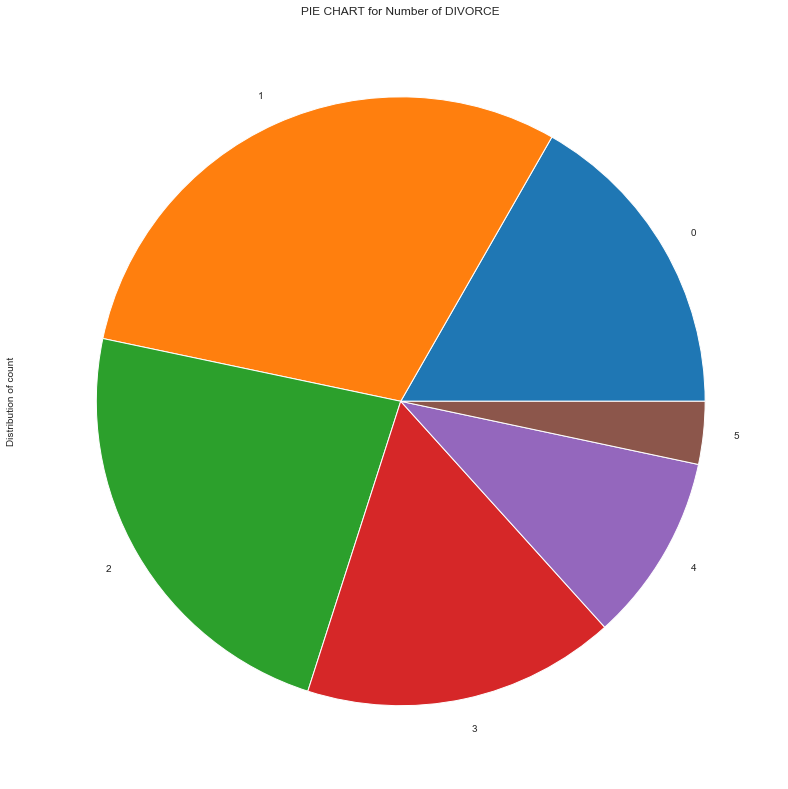

In [8]:
df1.groupby(['Number_of_divorce']).size().plot.pie(figsize=(14,14))
plt.title('PIE CHART for Number of DIVORCE')
plt.ylabel('Distribution of count')

Text(0.5, 1.0, 'Proportion of Fraud distribution base on the number of Children')

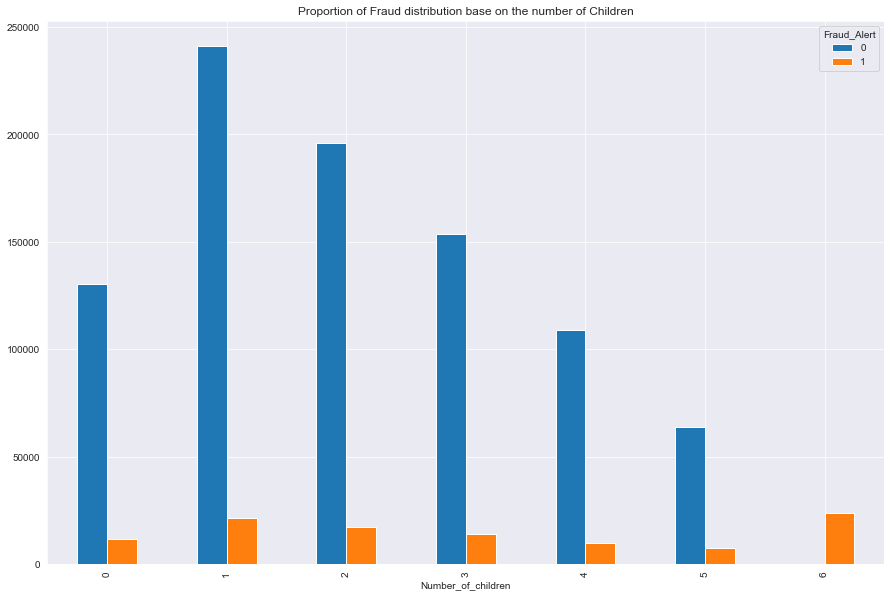

In [9]:
pd.crosstab(df1['Number_of_children'],df1['Fraud_Alert']).plot.bar(figsize=(15,10))
plt.title('Proportion of Fraud distribution base on the number of Children')